<a href="https://colab.research.google.com/github/alexgondim/ciencia_de_dados/blob/main/anlise_dados_criminais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
import pandas as pd
import numpy as np 


def read_year_data(year):
    file = pd.read_csv('./drive/MyDrive/dados/ocorrenciasmun-brasil{}.csv'.format(year), encoding='latin-1',sep=';',skiprows=4)
    return format_columns(file)

def format_columns(data):
    data.columns=[
    "regiao",
    "uf",
    "estado",
    "codigo_IBGE",
    "municipio",
    "crime",
    "ano",
    "mes",
    "ocorrencias"
    ]
    return data


def read_all_data():
    '''A função carrega todos os dados dos csvs de ocorrencias do Brasil
    '''
    files = glob.glob('dados/*.csv')
    years = []
    for file in files:
        data = pd.read_csv(file, encoding='latin-1',sep=';',skiprows=4)
        years.append(data)
    return format_columns(pd.concat(years))

def format_legend(legend_handless):
    legend = []
    for label in legend_handless[1]:
            legend.append(label.split(",")[1][:-1])
    return legend

def create_month_xlegend(months):
    xlegend = ['']
    for month in months:
        if(int(month[1].split('/')[0]) % 2 != 0):
            xlegend.append(month[1])
    return xlegend

def create_year_xlegend(years):
    xlegend = ['']
    for year in years:
        if(int(year) % 2 == 0):
            xlegend.append(year)
    return xlegend



In [ ]:
year = read_year_data(2017)

In [ ]:
year.head(7)

,regiao,uf,estado,codigo_IBGE,municipio,crime,ano,mes,ocorrencias
0,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,1,01/2017,3.0
1,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,2,02/2017,1.0
2,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,3,03/2017,6.0
3,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,4,04/2017,3.0
4,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,5,05/2017,8.0
5,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,6,06/2017,4.0
6,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Furto de veículo,1,01/2017,146.0


In [ ]:
del(year['codigo_IBGE'])

In [ ]:
year.head(10)

,regiao,uf,estado,municipio,crime,ano,mes,ocorrencias
0,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,1,01/2017,3.0
1,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,2,02/2017,1.0
2,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,3,03/2017,6.0
3,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,4,04/2017,3.0
4,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,5,05/2017,8.0
5,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,6,06/2017,4.0
6,CENTRO-OESTE,DF,Distrito Federal,Brasília,Furto de veículo,1,01/2017,146.0
7,CENTRO-OESTE,DF,Distrito Federal,Brasília,Furto de veículo,2,02/2017,38.0
8,CENTRO-OESTE,DF,Distrito Federal,Brasília,Furto de veículo,3,03/2017,130.0
9,CENTRO-OESTE,DF,Distrito Federal,Brasília,Furto de veículo,4,04/2017,109.0


In [ ]:
year.describe()

,ano,ocorrencias
count,27097.000000,27097.000000
mean,3.475846,6.923530
std,1.729305,28.142846
min,1.000000,1.000000
25%,2.000000,1.000000
50%,4.000000,2.000000
75%,5.000000,4.000000
max,6.000000,963.000000


In [ ]:
crime = year.groupby(['crime'])
occurrences = crime.agg({'ocorrencias':sum})
occurrences

,ocorrencias
crime,
Estupro,15781.000
Furto de veículo,74867.380
Homicídio doloso,20649.000
Lesão corporal seguida de morte,425.000
Roubo de veículo,74952.515
Roubo seguido de morte (latrocínio),932.000


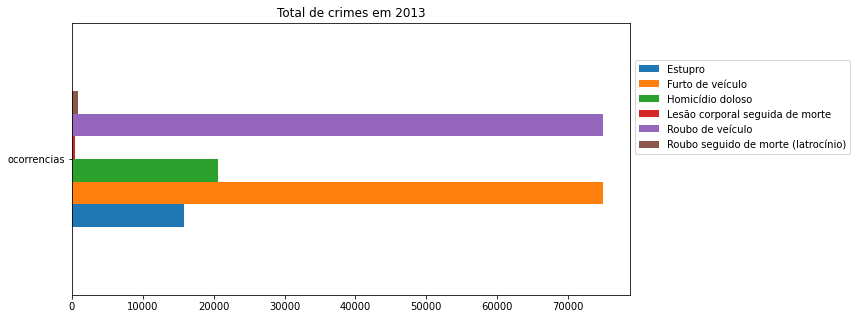

In [ ]:
occurrences_barh_plot = occurrences.T.plot.barh(title="Total de crimes em 2013", figsize=(10,5))
occurrences_barh_plot.legend(loc="lower left", bbox_to_anchor=(1, 0.5))
occurrences_barh_plot

In [ ]:
crimes_per_month = year.groupby(['mes','crime']).agg({'ocorrencias':sum})
crimes_per_month.head()

ocorrencias
mes     crime                                       
01/2017 Estupro                             2968.000
        Furto de veículo                   13779.216
        Homicídio doloso                    3786.000
        Lesão corporal seguida de morte       72.000
        Roubo de veículo                   13020.852

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2463d27c0>,
      dtype=object)

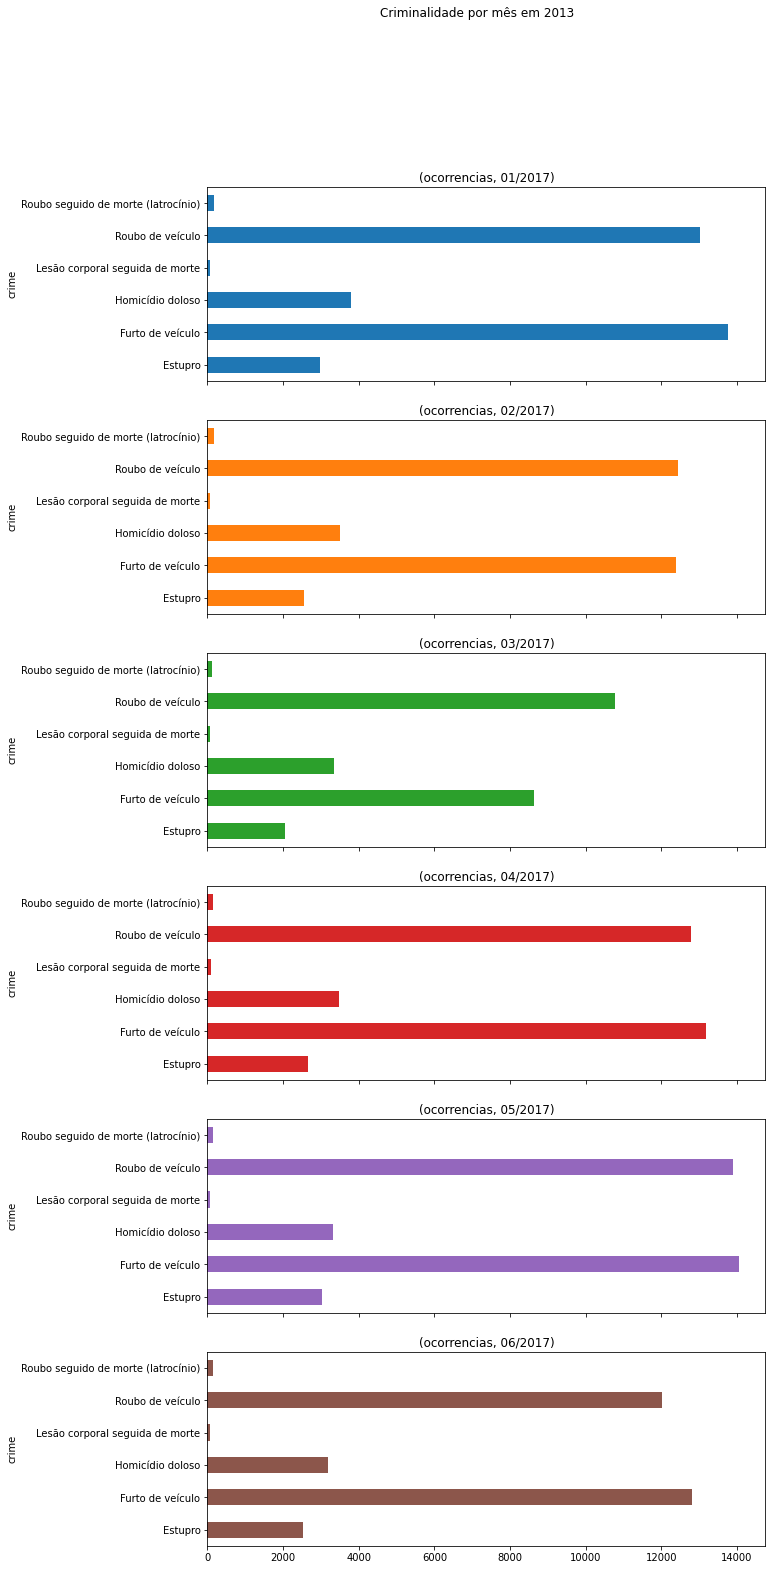

In [ ]:
crime_per_month_bar_graph = crimes_per_month.unstack(level=0)
crime_per_month_bar_graph.plot(kind="barh", figsize=(10,25), subplots=True, legend=False, title="Criminalidade por mês em 2013")

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x7fd245dacd90>>

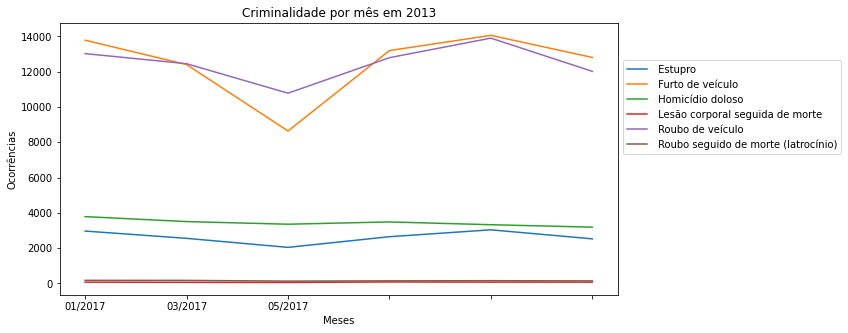

In [ ]:
crime_per_month_line_graph = crimes_per_month.unstack(1).plot(kind="line", figsize=(10,5), subplots=False, legend=False, title="Criminalidade por mês em 2013")
legend_month = format_legend(crime_per_month_line_graph.get_legend_handles_labels())
crime_per_month_line_graph.legend(legend_month,loc="lower left", bbox_to_anchor=(1, 0.5))
crime_per_month_line_graph.set_ylabel("Ocorrências")
crime_per_month_line_graph.set_xlabel("Meses")
crime_per_month_line_graph_xlabel = create_month_xlegend(crimes_per_month.unstack(0))
crime_per_month_line_graph.set_xticklabels(crime_per_month_line_graph_xlabel)
crime_per_month_line_graph.plot

In [ ]:
crimes_per_city = year.groupby(['municipio','crime'], as_index=False).agg({'ocorrencias':sum})
crime_per_city_max = crimes_per_city.groupby(['crime']).agg({'ocorrencias':max})
criteria = ['ocorrencias','crime']
crime_per_city_graph = pd.merge(crime_per_city_max,crimes_per_city,on=criteria)
crime_per_city_graph

,ocorrencias,crime,municipio
0,966.0,Estupro,São Paulo
1,2811.0,Furto de veículo,Curitiba
2,815.0,Homicídio doloso,Fortaleza
3,53.0,Lesão corporal seguida de morte,Natal
4,4500.0,Roubo de veículo,Porto Alegre
5,63.0,Roubo seguido de morte (latrocínio),São Paulo


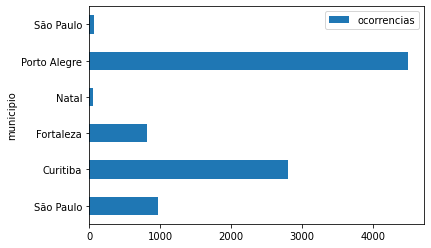

In [ ]:
crime_per_city_graph.plot(kind='barh',y='ocorrencias',x='municipio')

In [ ]:
data = read_all_data()

In [ ]:
del(data['codigo_IBGE'])

In [ ]:
data.head()

,regiao,uf,estado,municipio,crime,ano,mes,ocorrencias
0,SUDESTE,ES,Espírito Santo,Cachoeiro De Itapemirim,Estupro,1,01/2004,1.0
1,SUDESTE,ES,Espírito Santo,Cachoeiro De Itapemirim,Estupro,3,03/2004,2.0
2,SUDESTE,ES,Espírito Santo,Cachoeiro De Itapemirim,Estupro,5,05/2004,4.0
3,SUDESTE,ES,Espírito Santo,Cachoeiro De Itapemirim,Estupro,6,06/2004,2.0
4,SUDESTE,ES,Espírito Santo,Cachoeiro De Itapemirim,Estupro,7,07/2004,1.0


In [ ]:
data.tail()

,regiao,uf,estado,municipio,crime,ano,mes,ocorrencias
11489,SUL,SC,Santa Catarina,Até 100.000 Habitantes,Roubo seguido de morte (latrocínio),8,08/2009,7.0
11490,SUL,SC,Santa Catarina,Até 100.000 Habitantes,Roubo seguido de morte (latrocínio),9,09/2009,2.0
11491,SUL,SC,Santa Catarina,Até 100.000 Habitantes,Roubo seguido de morte (latrocínio),10,10/2009,3.0
11492,SUL,SC,Santa Catarina,Até 100.000 Habitantes,Roubo seguido de morte (latrocínio),11,11/2009,3.0
11493,SUL,SC,Santa Catarina,Até 100.000 Habitantes,Roubo seguido de morte (latrocínio),12,12/2009,2.0


In [ ]:
data['ano'] = data['mes'].apply(lambda element: element.split("/")[1])

In [ ]:
data.head()

,regiao,uf,estado,municipio,crime,ano,mes,ocorrencias
0,SUDESTE,ES,Espírito Santo,Cachoeiro De Itapemirim,Estupro,2004,01/2004,1.0
1,SUDESTE,ES,Espírito Santo,Cachoeiro De Itapemirim,Estupro,2004,03/2004,2.0
2,SUDESTE,ES,Espírito Santo,Cachoeiro De Itapemirim,Estupro,2004,05/2004,4.0
3,SUDESTE,ES,Espírito Santo,Cachoeiro De Itapemirim,Estupro,2004,06/2004,2.0
4,SUDESTE,ES,Espírito Santo,Cachoeiro De Itapemirim,Estupro,2004,07/2004,1.0


In [ ]:
crime_occurrences = data.groupby(['ano'],as_index=False).agg({'ocorrencias':sum})

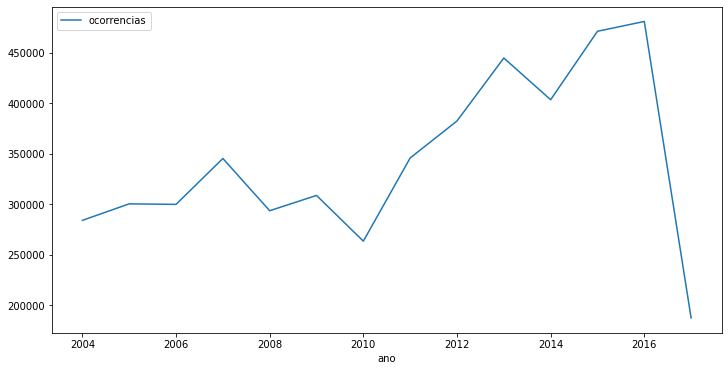

In [ ]:
crime_occurrences_xlegend = create_year_xlegend(crime_occurrences.ano)
crime_occurrences.plot(kind="line", x='ano', y='ocorrencias', figsize=(12,6)).set_xticklabels(crime_occurrences_xlegend,rotation=0)
crime_occurrences.plot

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x7fd242a9a490>>

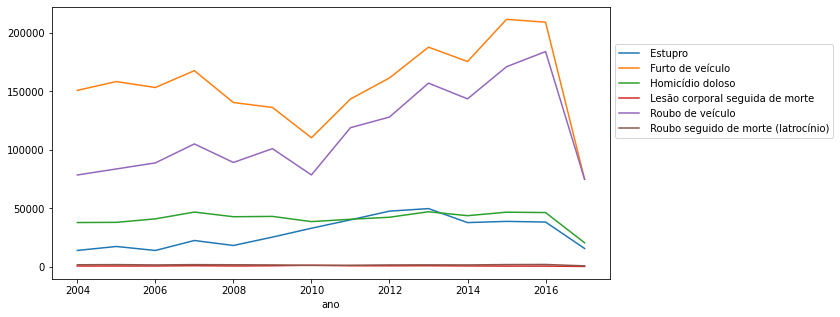

In [ ]:
crimes_in_history = data.groupby(['crime','ano']).agg({'ocorrencias':sum})
crimes_in_history_line_graph = crimes_in_history.unstack(0).plot(kind="line",legend=True, subplots=False,figsize=(10,5))
legend_history = format_legend(crime_per_month_line_graph.get_legend_handles_labels())
crimes_in_history_line_graph.legend(legend_history,loc="lower left", bbox_to_anchor=(1, 0.5))
crimes_in_history_xlabel = create_year_xlegend(crimes_in_history.unstack(0).index)
crimes_in_history_line_graph.set_xticklabels(crimes_in_history_xlabel)
crimes_in_history_line_graph.plot

In [ ]:
max_occurrences_by_year = data.groupby(['crime','ano']).agg({"ocorrencias":sum}).unstack(1).sum()

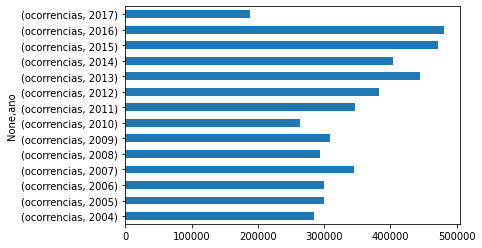

In [ ]:
max_occurrences_by_year.plot(kind="barh")